## === Task ===

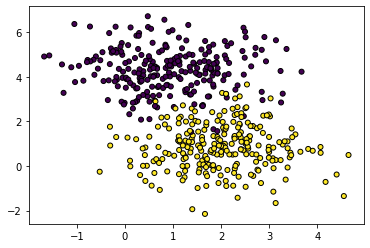

In [48]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [49]:
# Class Logistic Regression
class LogisticRegression:
    def __init__(self, method="minibatch", l_rate=0.01, 
                    batch_percent=10, max_iter=1000):
        self.method = method
        self.l_rate = l_rate
        self.batch_percent = batch_percent
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        batch_size = int(self.batch_percent/100 * X.shape[0])
        self.loss = []        
        for i in range(self.max_iter):
            if self.method == "minibatch":
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix:ix+batch_size]
                batch_y = y[ix:ix+batch_size]
            elif self.method == "sto":
                ix = np.random.randint(0, X.shape[0])
                batch_X = X[ix]
                batch_y = y[ix]
            elif self.method == "batch":
                batch_X = X
                batch_y = y
            else:
                print("Method is not match")
            cost, grad = self.gradient(batch_X, batch_y, self.w)
            self.loss.append(cost)
            self.w = self.w - self.l_rate * grad
        self.iter = i+1
        self.yhat = self.y_predict(X_test)

    def sigmoid(self, x):        
        return 1 / (1 + np.exp(-x))

    def gradient(self, X, y, w):
        h = self.h_theta(X, w)
        error = h - y
        # putting negative sign for negative log likelihood
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad

    def h_theta(self, X, w):
        return self.sigmoid(X @ w)

    def plot_loss(self):
        x_axis = [*range(self.iter)]
        y_axis = self.loss
        plt.plot(x_axis, y_axis)
        plt.title("Losses - iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Losses")

    def y_predict(self, X):
        return np.round(self.h_theta(X, self.w))




In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

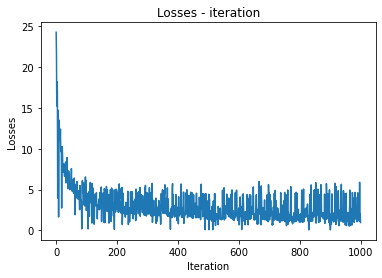

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.plot_loss()

In [56]:
class classification_report:
    def __init__(self, y_actual, y_predict):
        self.y_actual = y_actual
        self.y_predict = y_predict
        self.TP = sum((self.y_actual == 1) & (self.y_predict == 1))
        self.FN = sum((self.y_actual == 1) & (self.y_predict == 0))
        self.FP = sum((self.y_actual == 0) & (self.y_predict == 1))
        self.TN = sum((self.y_actual == 0) & (self.y_predict == 0))

    def accuracy(self):
        ans = (self.TP + self.TN)/(self.TP + self.TN + self.FP + self.FN)
        return ans
        
    def precision(self):
        ans =(self.TP)/(self.TP + self.FP)
        return ans

    def recall(self):
        ans = (self.TP)/(self.TP + self.FN)
        return ans
        
    def f1(self):
        ans = 2*(self.precision * self.Recall)/(self.precision + self.Recall)
        return ans

    def get_report(self):
        return self.accuracy, self.precision, self.Recall, self.F1


In [55]:
yhat = model.y_predict(X_test)
report = classification_report(y_test, yhat)

print("*** Report from scratch ***")
print("Accuracy\t", report.accuracy())
print("Precision\t", report.precision())
print("Recall\t\t", report.Recall())
#print("F1\t\t", report.F1())

from sklearn.metrics import classification_report
print("\n*** Report from scratch ***")
print("Report: ", classification_report(y_test, model.y_predict(X_test)))

*** Report from scratch ***


AttributeError: 'str' object has no attribute 'accuracy'